<a href="https://colab.research.google.com/github/greeshmanth-5/Greeshmanth_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [5]:
data = pd.read_csv('imdb_reviews.csv')
print(data.columns)

Index(['Review Text'], dtype='object')


In [7]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
import pandas as pd
from nltk import ngrams, word_tokenize, pos_tag
from collections import Counter

# Load the dataset (replace 'path/to/your/dataset.csv' with the actual path)
data = pd.read_csv('imdb_reviews.csv')

# Function to tokenize and get N-grams
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return list(n_grams)

# Step 1: Count the frequency of all the N-grams (N=3)
all_ngrams = [ngram for text in data['Review Text'] for ngram in get_ngrams(text, 3)]
ngram_counts = Counter(all_ngrams)

# Step 2: Calculate the probabilities for all bigrams
bigram_probabilities = {}
for bigram in bigrams:
    denominator = ngram_counts[bigram[:-1]]
    bigram_probabilities[bigram] = ngram_counts[bigram] / denominator if denominator != 0 else 0
# Step 3: Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    noun_phrases = [chunk[0] for chunk in tagged_tokens if 'NN' in chunk[1]]
    return noun_phrases

noun_phrases = [noun_phrase for text in data['Review Text'] for noun_phrase in extract_noun_phrases(text)]
noun_phrase_counts = Counter(noun_phrases)
max_counts = {noun_phrase: max(noun_phrase_counts.values()) for noun_phrase in noun_phrase_counts}

# Create a table with relative probabilities
result_table = pd.DataFrame(index=data.index, columns=noun_phrase_counts.keys())
for i, text in enumerate(data['Review Text']):
    noun_phrases_in_text = extract_noun_phrases(text)
    for noun_phrase in noun_phrase_counts.keys():
        result_table.at[i, noun_phrase] = noun_phrases_in_text.count(noun_phrase) / max_counts[noun_phrase]

# Print the result table
print(result_table)


   Shawshank Redemption     Frank  Darabont adaptation   Stephen      King  \
0   0.088889   0.033333  0.011111  0.011111   0.011111  0.011111  0.011111   
1        0.0        0.0       0.0       0.0        0.0       0.0       0.0   
2   0.155556   0.011111       0.0       0.0        0.0       0.0       0.0   
3        0.0        0.0  0.011111  0.011111        0.0       0.0       0.0   
4   0.066667   0.044444  0.011111  0.011111        0.0  0.011111  0.011111   
5        0.0        0.0       0.0       0.0        0.0       0.0       0.0   
6   0.022222   0.011111       0.0       0.0        0.0  0.011111  0.022222   
7        0.0        0.0       0.0       0.0        0.0  0.011111  0.011111   
8   0.033333        0.0  0.011111  0.011111        0.0  0.011111  0.022222   
9        0.0        0.0       0.0       0.0        0.0  0.022222  0.022222   
10       0.0        0.0       0.0       0.0        0.0       0.0       0.0   
11       0.0        0.0       0.0       0.0        0.0  0.011111

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [12]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the IMDb reviews dataset
data = pd.read_csv('imdb_reviews.csv')

# Sample query (replace with your own query)
query = "Outstanding movie with great character development and brilliant acting"

# Combine the query with the existing reviews
reviews = data['Review Text'].tolist()
reviews.append(query)

# Use TfidfVectorizer to build the tf*idf matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(reviews)

# Compute cosine similarity between the query and reviews
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Create a DataFrame to store the results
results = pd.DataFrame({
    'ReviewID': data.index,
    'CosineSimilarity': cosine_similarities[0]
})

# Sort the reviews based on cosine similarity
results = results.sort_values(by='CosineSimilarity', ascending=False)

# Display the ranked reviews
print("Ranked Reviews:")
print(results[['ReviewID', 'CosineSimilarity']])







Ranked Reviews:
    ReviewID  CosineSimilarity
9          9          0.190482
6          6          0.126420
11        11          0.103769
15        15          0.099051
17        17          0.097929
3          3          0.090545
14        14          0.088699
23        23          0.081075
16        16          0.076736
10        10          0.074048
20        20          0.071508
24        24          0.045388
2          2          0.044963
12        12          0.042656
21        21          0.040174
1          1          0.038949
5          5          0.036224
7          7          0.026240
4          4          0.022329
19        19          0.020900
22        22          0.017544
8          8          0.016701
0          0          0.015104
13        13          0.004639
18        18          0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [13]:
!pip install gensim


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


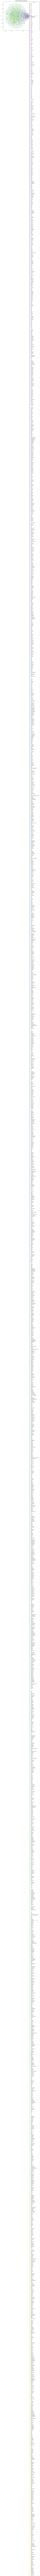

In [16]:
# Write your code here
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data collected for assignment two (replace with your data)
data = pd.read_csv('imdb_reviews.csv')

# Tokenize the text into sentences
sentences = [str(sentence).split() for sentence in data['Review Text']]

# Train a Word2Vec model
embedding_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embeddings using t-SNE
def visualize_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(word_vectors)

    df_embeddings = pd.DataFrame(embeddings_2d, columns=['X', 'Y'])
    df_embeddings['Word'] = words

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='X', y='Y', data=df_embeddings, hue='Word', palette='viridis', alpha=0.7)
    plt.title('Word Embedding Visualization')
    plt.show()

# Visualize the embeddings
visualize_embeddings(embedding_model)







# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:https://github.com/greeshmanth-5/Greeshmanth_INFO5731_Fall2023/blob/main/imdb_reviews_annoted.numbers



